In [144]:
import networkx as nx

# Trying out networkx

## ChatGPT example

In [145]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 1)])

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]


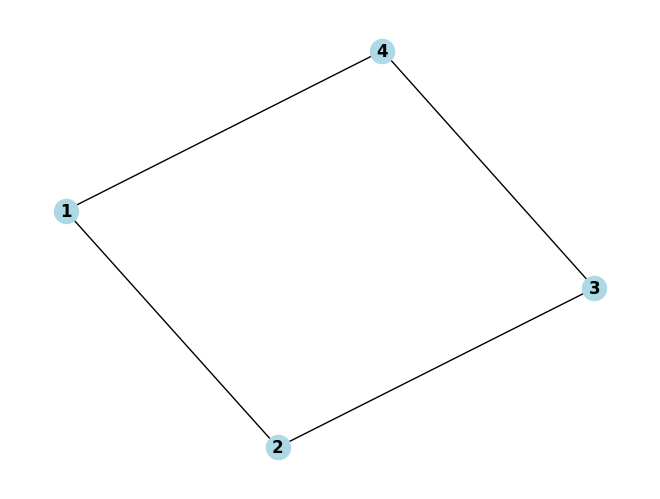

In [146]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold")
plt.show()


In [147]:
# Compute shortest path between nodes
shortest_path = nx.shortest_path(G, source=1, target=3)
print("Shortest path:", shortest_path)


Shortest path: [1, 2, 3]


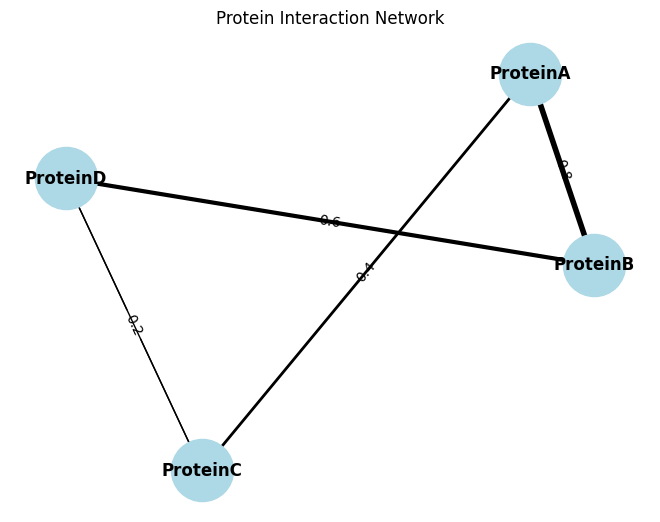

In [148]:
import networkx as nx
import matplotlib.pyplot as plt

# Define proteins and their interaction rates
proteins = ["ProteinA", "ProteinB", "ProteinC", "ProteinD"]
interactions = [
    ("ProteinA", "ProteinB", 0.8),  # High interaction
    ("ProteinA", "ProteinC", 0.4),  # Moderate interaction
    ("ProteinB", "ProteinD", 0.6),  # Moderate interaction
    ("ProteinC", "ProteinD", 0.2),  # Low interaction
]

# Create a weighted graph
G = nx.Graph()

# Add nodes (proteins)
G.add_nodes_from(proteins)

# Add weighted edges (interactions)
for u, v, weight in interactions:
    G.add_edge(u, v, weight=weight)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
edge_weights = nx.get_edge_attributes(G, "weight")

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
nx.draw_networkx_edges(G, pos, width=[weight * 5 for weight in edge_weights.values()])  # Scale edge thickness

plt.title("Protein Interaction Network")
plt.show()


## Tryout with colocalization table

### Load table

In [149]:
import pandas as pd
import numpy as np

from Sequential_Fish.pipeline_parameters import RUN_PATH

PATH = RUN_PATH + "/result_tables"
coloc = pd.read_feather(PATH + "/Colocalisation.feather")
acquisition = pd.read_feather(PATH + "/Acquisition.feather")
detection = pd.read_feather(PATH + "/Detection.feather")
detection['color_id'] = detection['color_id'].astype(int)
gene1_key = "Gene1 (Ch1 - Cy3 - CAM_1)"
gene2_key = "Beads (Ch2 - Green - CAM_2)"
acquisition

,acquisition_id,location,cycle,full_path,fish_shape,fish_map,dapi_full_path,dapi_shape,dapi_map,fish_reodered_shape,Cycle n.,Gene1 (Ch1 - Cy3 - CAM_1),Beads (Ch2 - Green - CAM_2),Barcode 1,Threshold_0
0,0,Location-01,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
1,1,Location-02,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
2,2,Location-03,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
3,3,Location-04,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
4,4,Location-05,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",0,POLR2A,Beads,22,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,Location-06,20,None,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",20,Washout,Beads,45,350
206,206,Location-07,20,None,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",20,Washout,Beads,45,350
207,207,Location-08,20,None,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",20,Washout,Beads,45,350
208,208,Location-09,20,None,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",20,Washout,Beads,45,350


### Merging names in Detection

In [150]:
rna_names = acquisition.melt(
    id_vars='acquisition_id',
    value_vars=[gene1_key],
    value_name="RNA",
    var_name="color_id"
    )
rna_names['color_id'] = rna_names['color_id'].replace({
    gene2_key : 1,
    gene1_key : 0,

}).astype(int)
rna_names

,acquisition_id,color_id,RNA
0,0,0,POLR2A
1,1,0,POLR2A
2,2,0,POLR2A
3,3,0,POLR2A
4,4,0,POLR2A
...,...,...,...
205,205,0,Washout
206,206,0,Washout
207,207,0,Washout
208,208,0,Washout


In [151]:
if 'RNA' not in detection.columns : 
    detection = pd.merge(
        detection,
        rna_names,
        on= ['acquisition_id', 'color_id'],
        validate= 'm:1',
    )
detection

,detection_id,acquisition_id,visual_name,filename,voxel_size,spot_size,alpha,beta,gamma,artifact_radius,cluster_size,min_spot_per_cluster,Threshold_0,threshold,color_id,image_path,image_key,location,RNA
0,1,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,525,525,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,1,Location-01,POLR2A
1,2,10,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,2,Location-01,Washout
2,3,20,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,3,Location-01,POLR2B
3,4,30,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,4,Location-01,Washout
4,5,40,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,5,Location-01,POLR2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,169,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,480,480,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,206,Location-10,POLR2K
206,207,179,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,207,Location-10,Washout
207,208,189,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,208,Location-10,POLR2L
208,209,199,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,209,Location-10,Washout


In [152]:
if 'RNA1' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA1'}),
        left_on= 'detection_id1',
        right_on= 'detection_id',
        validate='m:1'
    )
if 'RNA2' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA2'}),
        left_on= 'detection_id2',
        right_on= 'detection_id',
        validate='m:1',
    )
if 'detection_id' in coloc.columns : coloc = coloc.drop('detection_id', axis=1)
if 'detection_id_x' in coloc.columns : coloc = coloc.drop('detection_id_x', axis=1)
if 'detection_id_y' in coloc.columns : coloc = coloc.drop('detection_id_y', axis=1)
coloc

/tmp/ipykernel_517139/4253874863.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'detection_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  coloc = pd.merge(


,colocalisation_id,count,count_random_distribution,normalised_count,detection_id1,detection_id2,population1,population2,label,spot1_number,spot2_number,location,cell_id,spot1_total_number,spot2_total_number,fraction,sub_fraction,RNA1,RNA2
0,0,173.0,1.0,173.0,1,1,all,all,5,173,173,Location-01,0,173,173,1.000000,1.000000,POLR2A,POLR2A
1,1,123.0,1.0,123.0,1,1,free,all,5,123,173,Location-01,0,173,173,0.710983,1.000000,POLR2A,POLR2A
2,2,50.0,1.0,50.0,1,1,clustered,all,5,50,173,Location-01,0,173,173,0.289017,1.000000,POLR2A,POLR2A
3,3,124.0,1.0,124.0,1,1,all,free,5,173,123,Location-01,0,173,173,0.716763,0.716763,POLR2A,POLR2A
4,4,123.0,1.0,123.0,1,1,free,free,5,123,123,Location-01,0,173,173,0.710983,1.000000,POLR2A,POLR2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258168,1258168,NaN,NaN,NaN,210,210,free,free,40,0,0,Location-10,316,0,0,NaN,NaN,Washout,Washout
1258169,1258169,NaN,NaN,NaN,210,210,clustered,free,40,0,0,Location-10,316,0,0,NaN,NaN,Washout,Washout
1258170,1258170,NaN,NaN,NaN,210,210,all,clustered,40,0,0,Location-10,316,0,0,NaN,NaN,Washout,Washout
1258171,1258171,NaN,NaN,NaN,210,210,free,clustered,40,0,0,Location-10,316,0,0,NaN,NaN,Washout,Washout


### Computing average interaction rate

Interaction rate is taken as colocalization rate from 0 to 1 convert to percentage (x100)

In [153]:
def create_interaction_df(
        coloc : pd.DataFrame,
        population1 : str,
        population2 : str,
        washout_keyword = "Washout"
) :
    df = coloc.loc[(coloc['population1'] ==population1) & (coloc['population2'] == population2)]
    df = df.groupby(['RNA1', 'RNA2']).agg({
        "sub_fraction" : "mean",
        "fraction" : "mean",
        "normalised_count" : "mean",
        "spot1_number" : "sum",
    })

    for key in ['sub_fraction', 'fraction'] :
        df[key] *= 100
        df[key] = df[key].round().astype(int)
    
    df = df.reset_index(drop=False).rename(columns={
        'sub_fraction' : 'colocalisation',
        'fraction' : 'global_population_colocalisation',
        'normalised_count' : 'normalised_colocalisation_count',
        'spot1_number' : 'total_spot_number'
        })
    
    df = df.loc[(df['RNA1'] != washout_keyword) & (df['RNA2'] != washout_keyword)]
    df = df.loc[(df['RNA1'] != df['RNA2'])]

    return df

In [154]:
global_interactions = create_interaction_df(
    coloc,
    population1="all",
    population2="all",
)
all_to_clustered_interactions = create_interaction_df(
    coloc,
    population1="clustered",
    population2="all"
)

RNAs = pd.unique(
    pd.concat([global_interactions['RNA1'], global_interactions['RNA2']])
)


global_interactions.sort_values(['normalised_colocalisation_count', 'colocalisation'], ascending=False)

,RNA1,RNA2,colocalisation,global_population_colocalisation,normalised_colocalisation_count,total_spot_number
104,POLR2L,POLR2H,7,7,13.816482,27868
64,POLR2H,POLR2L,8,8,12.570557,25587
103,POLR2L,POLR2F,9,9,12.311960,27868
49,POLR2F,POLR2H,5,5,11.932440,68460
59,POLR2H,POLR2F,9,9,11.395584,25587
...,...,...,...,...,...,...
17,POLR2B,POLR2I,0,0,0.369085,26849
89,POLR2K,POLR2B,1,1,0.345779,8653
19,POLR2B,POLR2K,0,0,0.328076,26849
28,POLR2C,POLR2I,0,0,0.328076,21355


In [155]:
all_to_clustered_interactions.sort_values(['normalised_colocalisation_count', 'colocalisation'], ascending=False)

,RNA1,RNA2,colocalisation,global_population_colocalisation,normalised_colocalisation_count,total_spot_number
104,POLR2L,POLR2H,49,6,20.974359,1420
105,POLR2L,POLR2I,42,5,17.794872,1420
102,POLR2L,POLR2E,41,5,15.987179,1420
106,POLR2L,POLR2J,36,5,14.897436,1420
103,POLR2L,POLR2F,39,5,14.333333,1420
...,...,...,...,...,...,...
9,POLR2A,POLR2L,0,0,0.200000,9907
7,POLR2A,POLR2J,1,0,0.186441,9907
5,POLR2A,POLR2H,0,0,0.176271,9907
6,POLR2A,POLR2I,0,0,0.098305,9907


### coloc data visualisation

In [156]:
from pbwrap.plot.utils import get_colors_list
from adjustText import adjust_text

In [157]:
def scatter_plot_coloc_vs_norm_count(df : pd.DataFrame) :
    plt.figure(figsize=(10,10))
    labels = list(zip(df['RNA1'],df['RNA2']))
    color_list = get_colors_list(len(df['RNA1'].unique()))


    X = list(df['normalised_colocalisation_count'])
    Y = list(df['colocalisation'])
    plt.scatter(X, Y)
    annotations = zip(X,Y,labels)
    texts = [plt.text(*annotation) for annotation in annotations]
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray'))

    plt.xlabel('Normalised colocalisation count ()')
    plt.ylabel('colocalisation event (%)')

    plt.show()  

26 [0.11319072 0.69570011]
73 [-0.07671854  0.3696124 ]
24 [0.25150101 0.35816425]
46 [0.23535633 0.40538051]
22 [0.4719032  0.28443369]
74 [-0.89926187  0.07271952]


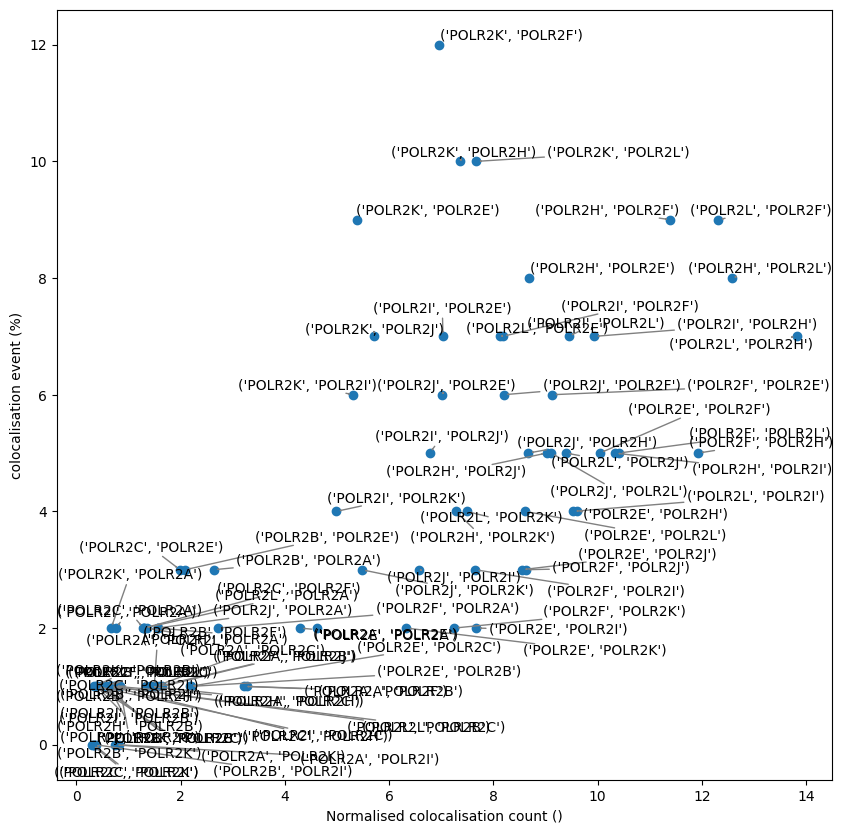

In [158]:
scatter_plot_coloc_vs_norm_count(global_interactions)

23 [0.78000384 0.59197139]
24 [-0.87963363 -0.6378246 ]
2 [ 0.9530818  -0.51662587]
38 [ 0.05331494 -0.36901689]
5 [0.64170287 0.69899547]
7 [0.47252338 0.93491972]
5 [-0.44955472  0.24049287]
7 [ 0.83277104 -0.53737747]
5 [-0.75285607 -0.71037052]
7 [ 0.80238773 -0.70918757]
5 [0.71606381 0.04283389]
7 [0.34838579 0.73622556]
5 [ 0.44339033 -0.78993085]
7 [ 0.28081659 -0.87241023]
5 [0.25182241 0.13181816]
7 [0.4860504  0.00866238]
5 [-0.79379122  0.6114206 ]
7 [0.43448828 0.86365081]
5 [-0.83804097  0.55241   ]
7 [ 0.87414143 -0.89503568]


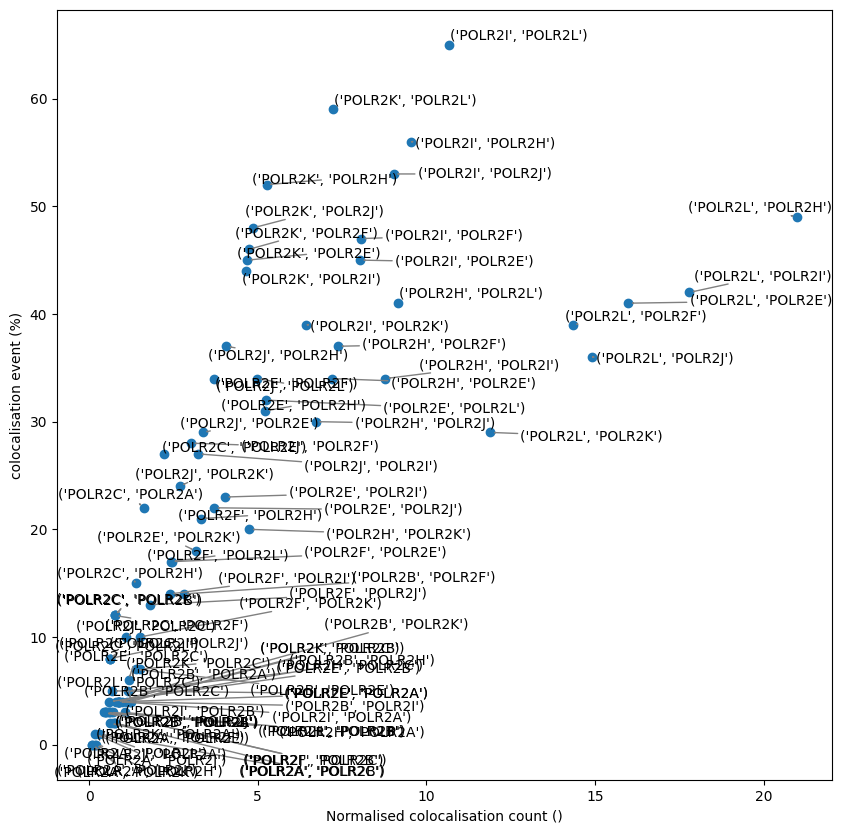

In [159]:
scatter_plot_coloc_vs_norm_count(all_to_clustered_interactions)


## Creating networkx undirected graph

### Testing directed multi-graph

In [162]:
interaction_graph = nx.MultiDiGraph()
data = list(all_to_clustered_interactions.loc[:,['RNA1','RNA2','colocalisation']].itertuples(index=False, name=None))
interaction_graph.add_weighted_edges_from(data)

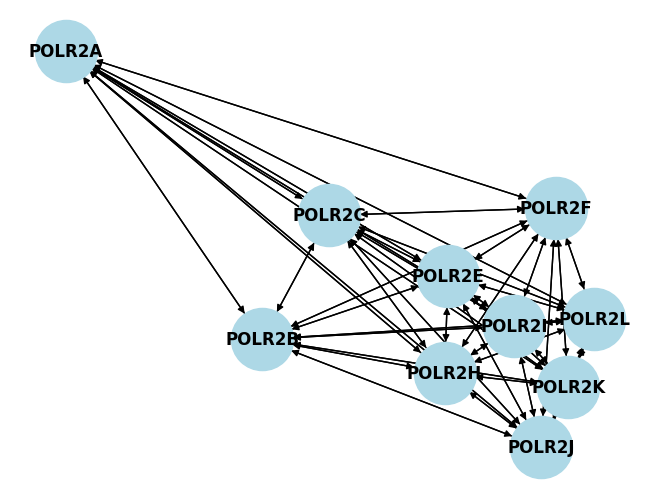

In [163]:
# pos = nx.spring_layout(interaction_graph, k=3)  # Layout for consistent positioning
nx.draw(interaction_graph, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)

## Clique/Comunities theory

Clique are subset of Graphs where all elements are linked. Our graph is fully connected so we should find one clique with all elements ?

Afterwards we'll try tu use weight to make different clique

Clique algorithm don't work with multi connected graph but only with undirected ones.

## Louvain algorithm

Tries to maximise modularity in comunities, which will never leave weakly connected node alone.

In [164]:
l_communities = nx.community.louvain_communities(interaction_graph)
print(l_communities)
print(type(l_communities))
print(type(l_communities[0]))

[{'POLR2C', 'POLR2B', 'POLR2A'}, {'POLR2K', 'POLR2J', 'POLR2H', 'POLR2L', 'POLR2I', 'POLR2F', 'POLR2E'}]
<class 'list'>
<class 'set'>


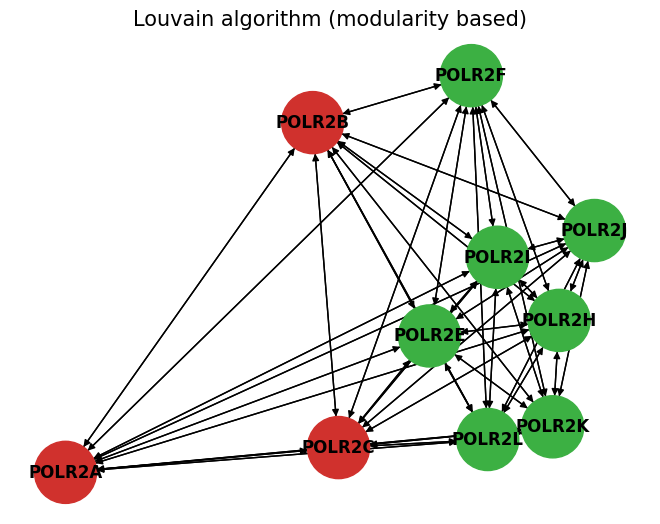

In [165]:
from pbwrap.plot.utils import get_colors_list
color_list = get_colors_list(len(l_communities))

# color_list = ['blue','red']

for comunity, color in zip(l_communities, color_list) :
    for node in comunity :
        interaction_graph.nodes[node]['color'] = color


color_list = [data[1] for data in interaction_graph.nodes(data='color')]
nx.draw(interaction_graph, node_color = color_list, with_labels=True,font_weight="bold", node_size=2000)
plt.title("Louvain algorithm (modularity based)", fontdict={"size" : 15})
plt.show()

## Girvan–Newman algorithm

Wikipedia : 
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.

Vertex betweenness is an indicator of highly central nodes in networks. For any node i, vertex betweenness is defined as the fraction of shortest paths between pairs of nodes that run through it. It is relevant to models where the network modulates transfer of goods between known start and end points, under the assumption that such transfer seeks the shortest available route. 


--> Lets try to find an optimal number of clique, including singleton.

In [167]:
interaction_graph = nx.MultiDiGraph()
data = list(all_to_clustered_interactions.loc[:,['RNA1','RNA2','colocalisation']].itertuples(index=False, name=None))
interaction_graph.add_weighted_edges_from(data)

In [174]:
iteration_number = 10

com = nx.community.girvan_newman(interaction_graph)
for iteration in range(iteration_number) :
    try :
        communities = next(com)
        print(f"Iteration : {iteration + 1}")
        print(f"number of clique : {len(communities)}")
        print(communities)
        print()
    except StopIteration :
        break

Iteration : 1
number of clique : 2
({'POLR2A'}, {'POLR2I', 'POLR2C', 'POLR2F', 'POLR2H', 'POLR2J', 'POLR2K', 'POLR2L', 'POLR2B', 'POLR2E'})

Iteration : 2
number of clique : 3
({'POLR2A'}, {'POLR2B'}, {'POLR2I', 'POLR2C', 'POLR2F', 'POLR2H', 'POLR2J', 'POLR2K', 'POLR2L', 'POLR2E'})

Iteration : 3
number of clique : 4
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2I', 'POLR2F', 'POLR2H', 'POLR2J', 'POLR2K', 'POLR2L', 'POLR2E'})

Iteration : 4
number of clique : 5
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2I', 'POLR2F', 'POLR2H', 'POLR2J', 'POLR2K', 'POLR2L'})

Iteration : 5
number of clique : 6
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2F'}, {'POLR2I', 'POLR2H', 'POLR2J', 'POLR2K', 'POLR2L'})

Iteration : 6
number of clique : 7
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2F'}, {'POLR2H'}, {'POLR2J', 'POLR2K', 'POLR2L', 'POLR2I'})

Iteration : 7
number of clique : 8
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2F'}, {'POLR2H'}, {'POLR2I'}, {'PO